In [1]:
# Setup

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np

from utils.plot.utils import plot_second_order_phase_portrait, plot_second_order_phase_portrait_polar

plt.rcParams["figure.figsize"] = (20, 20)

def saveFig(filename, chapter):
  plt.savefig(f"plots/chapter{chapter}/{filename}.png", facecolor="w")

# Chapter 7 - Limit Cycles

- A **limit cycle** is an isolated closed trajectory
	- i.e. nearby trajectories are not closed, they spiral towards/away
	- **Stable** if nearby trajectories spiral towards, **unstable** if they spiral away, **half-stable** if on one side they spiral towards and away on the other side
	- Important for physical phenomena, they model systems that have self-sustained oscillations

## Simple Example
Consider:
$\dot{r} = r(1 - r^2)$, $\dot{\theta} = 1$

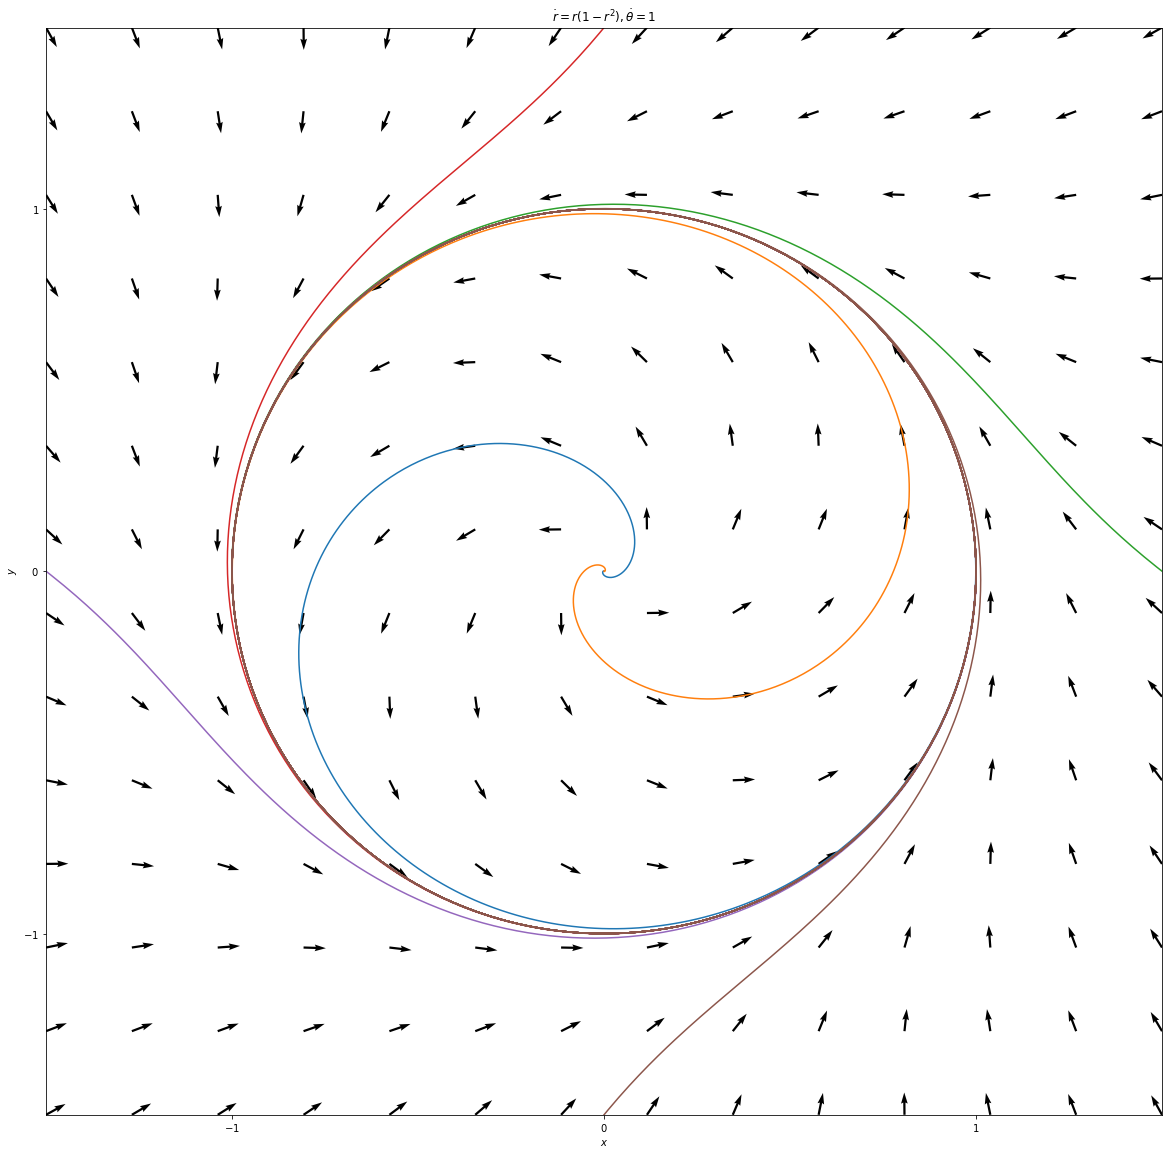

In [2]:
plot_second_order_phase_portrait_polar(lambda t, y: [y[0] * (1 - y[0] ** 2), 1], [[1e-4, 0], [1e-4, np.pi], [1.5, 0], [1.5, np.pi / 2], [1.5, np.pi], [1.5, 3 * np.pi / 2]], 1.5)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("$\dot{r} = r(1-r^2), \dot{\\theta} = 1$")
plt.xticks([-1, 0, 1], ["$-1$", "$0$", "$1$"])
plt.yticks([-1, 0, 1], ["$-1$", "$0$", "$1$"])
plt.show()